# Image Inpainting using OpenCV

In [1]:
import cv2
import os
import glob
import matplotlib.pyplot as plt

In [2]:
import os
os.getcwd()

'/mnt/processed/private/msds2025/cpt2/ML3/FinalProject/Inpainting'

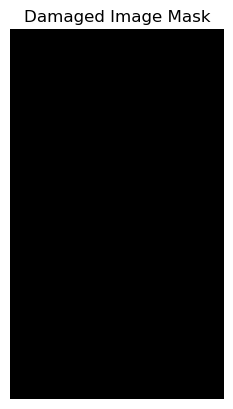

In [3]:
# Directory path
path_dir = "../data/v2-damaged-and-mask-dataset/img-with-val/test"

# Get a sample image file (e.g., first PNG or JPG)
image_paths = glob.glob(os.path.join(path_dir, "*.png")) + glob.glob(os.path.join(path_dir, "*.jpg"))
if not image_paths:
    raise FileNotFoundError("No image files found in the specified directory.")

# Use the first image for the operation
sample_path = image_paths[0]
damaged_img = cv2.imread(sample_path)

# Get the image shape
height, width = damaged_img.shape[0], damaged_img.shape[1]

# Convert non-black to black, black to white
for i in range(height):
    for j in range(width):
        if damaged_img[i, j].sum() > 0:
            damaged_img[i, j] = [0, 0, 0]
        else:
            damaged_img[i, j] = [255, 255, 255]

# Save the resulting mask
mask = damaged_img
cv2.imwrite("mask.jpg", mask)

# Display using matplotlib
plt.imshow(cv2.cvtColor(mask, cv2.COLOR_BGR2RGB))
plt.title("Damaged Image Mask")
plt.axis('off')
plt.show()


#### Damage mask extracted by OpenCV
Note the input here already has mask

In [ ]:
# Read the damaged image
damaged_img = cv2.imread("masked_image.png")

if damaged_img is None:
    raise FileNotFoundError("Image not found at path: masked_image.png")

# Create the mask:
# Any pixel that is NOT black becomes black; black stays white
mask = np.where(damaged_img.sum(axis=2, keepdims=True) > 0, [0, 0, 0], [255, 255, 255]).astype(np.uint8)

# Save mask
cv2.imwrite("mask.jpg", mask)

# Display using matplotlib (safe in all environments)
plt.imshow(cv2.cvtColor(mask, cv2.COLOR_BGR2RGB))
plt.title("Damaged Image Mask")
plt.axis("off")
plt.show()

In [3]:
import cv2
import numpy as np

# Load masked (damaged) image
damaged_img = cv2.imread("cracked-portrait.jpg")

# Convert to grayscale
gray = cv2.cvtColor(damaged_img, cv2.COLOR_BGR2GRAY)

# Any pixel with low intensity (near black) is considered damage
_, binary_mask = cv2.threshold(gray, thresh=5, maxval=255, type=cv2.THRESH_BINARY_INV)

# Save
cv2.imwrite("binary_mask_for_inpainting.png", binary_mask)


True

### Inpainting with Telea:

#### Original Damaged Image

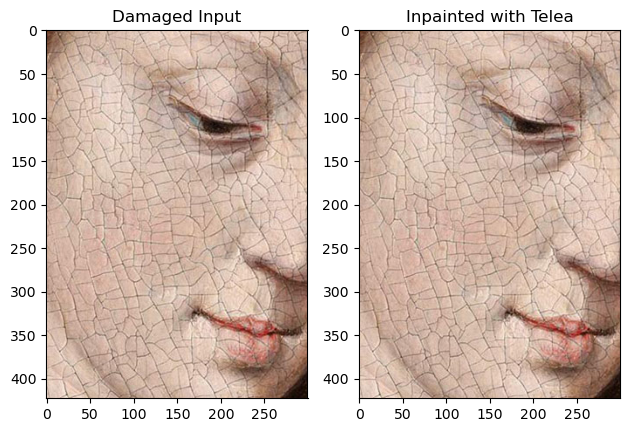

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load damaged image
damaged_img = cv2.imread("cracked-portrait.jpg")
if damaged_img is None:
    raise FileNotFoundError("Image not found at path: masked_image.png")

# Convert to grayscale and create mask (tolerant to near-black)
gray = cv2.cvtColor(damaged_img, cv2.COLOR_BGR2GRAY)
_, mask = cv2.threshold(gray, 5, 255, cv2.THRESH_BINARY_INV)

# Inpaint using Telea
inpaint_telea = cv2.inpaint(damaged_img, mask, inpaintRadius=3, flags=cv2.INPAINT_TELEA)

# Save or display
cv2.imwrite("telea_result.jpg", inpaint_telea)

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(damaged_img, cv2.COLOR_BGR2RGB))
plt.title("Damaged Input")

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(inpaint_telea, cv2.COLOR_BGR2RGB))
plt.title("Inpainted with Telea")

plt.tight_layout()
plt.show()

#### Damaged Image with Masking

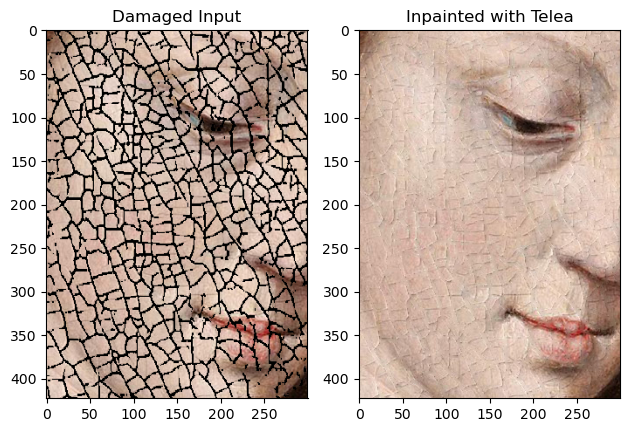

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load damaged image
damaged_img = cv2.imread("masked_image.png")
if damaged_img is None:
    raise FileNotFoundError("Image not found at path: masked_image.png")

# Convert to grayscale and create mask (tolerant to near-black)
gray = cv2.cvtColor(damaged_img, cv2.COLOR_BGR2GRAY)
_, mask = cv2.threshold(gray, 5, 255, cv2.THRESH_BINARY_INV)

# Inpaint using Telea
inpaint_telea = cv2.inpaint(damaged_img, mask, inpaintRadius=3, flags=cv2.INPAINT_TELEA)

# Save or display
cv2.imwrite("telea_result.jpg", inpaint_telea)

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(damaged_img, cv2.COLOR_BGR2RGB))
plt.title("Damaged Input")

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(inpaint_telea, cv2.COLOR_BGR2RGB))
plt.title("Inpainted with Telea")

plt.tight_layout()
plt.show()

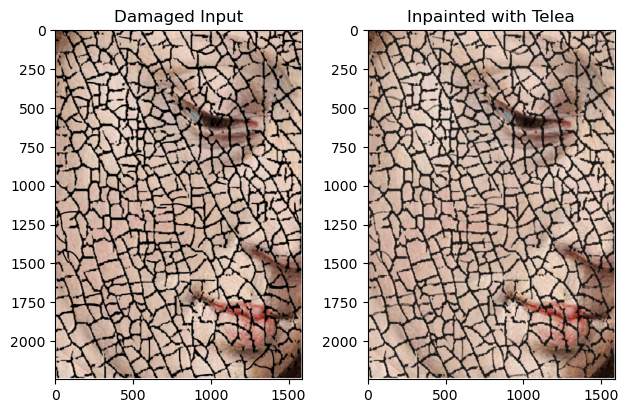

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load damaged image
damaged_img = cv2.imread("Untitled design.png")
if damaged_img is None:
    raise FileNotFoundError("Image not found at path: masked_image.png")

# Convert to grayscale and create mask (tolerant to near-black)
gray = cv2.cvtColor(damaged_img, cv2.COLOR_BGR2GRAY)
_, mask = cv2.threshold(gray, 5, 255, cv2.THRESH_BINARY_INV)

# Inpaint using Telea
inpaint_telea = cv2.inpaint(damaged_img, mask, inpaintRadius=3, flags=cv2.INPAINT_TELEA)

# Save or display
cv2.imwrite("telea_result.jpg", inpaint_telea)

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(damaged_img, cv2.COLOR_BGR2RGB))
plt.title("Damaged Input")

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(inpaint_telea, cv2.COLOR_BGR2RGB))
plt.title("Inpainted with Telea")

plt.tight_layout()
plt.show()

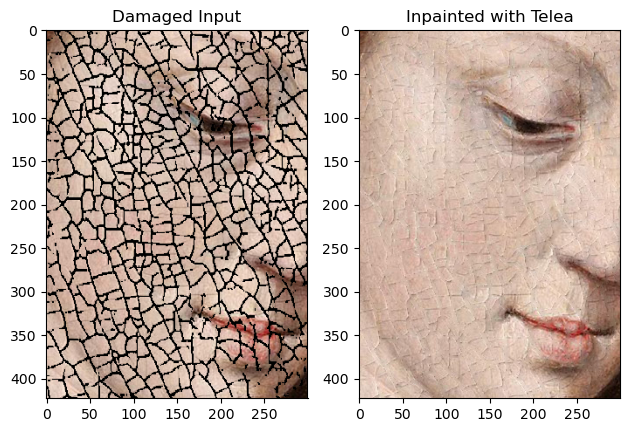

In [5]:
# Load damaged image
damaged_img = cv2.imread("masked_image.png")
if damaged_img is None:
    raise FileNotFoundError("Image not found at path: masked_image.png")

# Convert to grayscale and create mask (tolerant to near-black)
gray = cv2.cvtColor(damaged_img, cv2.COLOR_BGR2GRAY)
_, mask = cv2.threshold(gray, 5, 255, cv2.THRESH_BINARY_INV)

# Inpaint using Telea
inpaint_telea = cv2.inpaint(damaged_img, mask, inpaintRadius=3, flags=cv2.INPAINT_TELEA)

# Save or display
cv2.imwrite("telea_result.jpg", inpaint_telea)

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(damaged_img, cv2.COLOR_BGR2RGB))
plt.title("Damaged Input")

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(inpaint_telea, cv2.COLOR_BGR2RGB))
plt.title("Inpainted with Telea")

plt.tight_layout()
plt.show()

In [6]:
import cv2
import numpy as np

drawing = False       # True if mouse is pressed
erasing = False       # Right-click to erase
radius = 10           # Brush radius

def draw_mask(event, x, y, flags, param):
    global drawing, erasing, mask_display

    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
    elif event == cv2.EVENT_RBUTTONDOWN:
        erasing = True
    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing:
            cv2.circle(mask_display, (x, y), radius, 255, -1)
        elif erasing:
            cv2.circle(mask_display, (x, y), radius, 0, -1)
    elif event == cv2.EVENT_LBUTTONUP or event == cv2.EVENT_RBUTTONUP:
        drawing = False
        erasing = False

def edit_mask(image_path, mask_path):
    global mask_display

    # Load image and mask
    image = cv2.imread(image_path)
    orig_mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

    if image is None or orig_mask is None:
        raise FileNotFoundError("Image or mask file not found")

    # Create overlay window
    mask_display = orig_mask.copy()
    overlay = image.copy()

    cv2.namedWindow("Edit Mask")
    cv2.setMouseCallback("Edit Mask", draw_mask)

    while True:
        # Blend image and mask
        preview = overlay.copy()
        colored_mask = cv2.merge([mask_display]*3)
        preview[colored_mask > 0] = (0, 0, 255)  # Red overlay

        cv2.imshow("Edit Mask", preview)
        key = cv2.waitKey(1) & 0xFF

        if key == ord('q'):  # Quit without saving
            break
        elif key == ord('s'):  # Save and quit
            cv2.imwrite("mask_corrected.png", mask_display)
            print("Mask saved to mask_corrected.png")
            break

    cv2.destroyAllWindows()
    return mask_display


In [7]:
edited_mask = edit_mask("cracked-portrait.jpg", "mask.png")

error: OpenCV(4.11.0) /io/opencv/modules/highgui/src/window.cpp:1284: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvNamedWindow'


In [14]:
!pip install --upgrade gradio

Defaulting to user installation because normal site-packages is not writeable
DEPRECATION: omegaconf 2.0.6 has a non-standard dependency specifier PyYAML>=5.1.*. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of omegaconf or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [16]:
import gradio
print(gradio.__version__)

5.32.1


In [31]:
import gradio as gr
import cv2
import numpy as np
import os

def overlay_mask_on_image(image_path, mask_path, alpha=0.5):
    if not os.path.exists(image_path) or not os.path.exists(mask_path):
        raise FileNotFoundError("One or both image paths are invalid.")
    
    image = cv2.imread(image_path)
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

    # Resize mask to match image if needed
    if mask.shape != image.shape[:2]:
        mask = cv2.resize(mask, (image.shape[1], image.shape[0]))

    # Make overlay: red where mask = 255
    overlay = image.copy()
    overlay[mask > 0] = [0, 0, 255]  # red

    # Blend with alpha
    blended = cv2.addWeighted(image, 1 - alpha, overlay, alpha, 0)
    return cv2.cvtColor(blended, cv2.COLOR_BGR2RGB)

def save_edited_mask(edited_data):
    # Load original predicted mask (ensure it's 8-bit grayscale 0/255)
    orig_mask = cv2.imread("predicted_mask.png", cv2.IMREAD_GRAYSCALE)
    if orig_mask is None:
        raise FileNotFoundError("unet_mask.png not found")

    if isinstance(edited_data, dict) and "composite" in edited_data:
        composite = edited_data["composite"]
        background = edited_data["background"]

        # Convert both to grayscale
        composite_gray = cv2.cvtColor(composite, cv2.COLOR_RGB2GRAY)
        background_gray = cv2.cvtColor(background, cv2.COLOR_RGB2GRAY)

        # Extract user corrections
        diff = cv2.absdiff(composite_gray, background_gray)
        _, user_mask = cv2.threshold(diff, 20, 255, cv2.THRESH_BINARY)

        # Ensure original mask is binary
        _, orig_mask_bin = cv2.threshold(orig_mask, 127, 255, cv2.THRESH_BINARY)

        # Combine original mask + user corrections
        final_mask = cv2.bitwise_or(orig_mask_bin, user_mask)

        # Save and return for preview
        cv2.imwrite("mask_corrected.png", final_mask)
        return cv2.cvtColor(final_mask, cv2.COLOR_GRAY2RGB)

    return np.zeros((320, 320, 3), dtype=np.uint8)


# Generate overlay preview
composite_img = overlay_mask_on_image("predicted_original.png", "predicted_mask.png")

with gr.Blocks() as demo:
    gr.Markdown("### Trace over missing cracks in the predicted mask")
    editor = gr.ImageEditor(label="Draw on Mask Overlay", value=composite_img)
    save_btn = gr.Button("Save Refined Mask")
    output = gr.Image(label="Saved Mask Preview")

    save_btn.click(fn=save_edited_mask, inputs=editor, outputs=output)

demo.launch(share=True)


* Running on local URL:  http://127.0.0.1:7869
* Running on public URL: https://1e41482b87135d7e45.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [31]:
import gradio as gr
import cv2
import numpy as np
import os

def overlay_mask_on_image(image_path, mask_path, alpha=0.5):
    if not os.path.exists(image_path) or not os.path.exists(mask_path):
        raise FileNotFoundError("One or both image paths are invalid.")
    
    image = cv2.imread(image_path)
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

    # Resize mask to match image if needed
    if mask.shape != image.shape[:2]:
        mask = cv2.resize(mask, (image.shape[1], image.shape[0]))

    # Make overlay: red where mask = 255
    overlay = image.copy()
    overlay[mask > 0] = [0, 0, 255]  # red

    # Blend with alpha
    blended = cv2.addWeighted(image, 1 - alpha, overlay, alpha, 0)
    return cv2.cvtColor(blended, cv2.COLOR_BGR2RGB)

def save_edited_mask(edited_data):
    # Load original predicted mask (ensure it's 8-bit grayscale 0/255)
    orig_mask = cv2.imread("predicted_mask.png", cv2.IMREAD_GRAYSCALE)
    if orig_mask is None:
        raise FileNotFoundError("unet_mask.png not found")

    if isinstance(edited_data, dict) and "composite" in edited_data:
        composite = edited_data["composite"]
        background = edited_data["background"]

        # Convert both to grayscale
        composite_gray = cv2.cvtColor(composite, cv2.COLOR_RGB2GRAY)
        background_gray = cv2.cvtColor(background, cv2.COLOR_RGB2GRAY)

        # Extract user corrections
        diff = cv2.absdiff(composite_gray, background_gray)
        _, user_mask = cv2.threshold(diff, 20, 255, cv2.THRESH_BINARY)

        # Ensure original mask is binary
        _, orig_mask_bin = cv2.threshold(orig_mask, 127, 255, cv2.THRESH_BINARY)

        # Combine original mask + user corrections
        final_mask = cv2.bitwise_or(orig_mask_bin, user_mask)

        # Save and return for preview
        cv2.imwrite("mask_corrected.png", final_mask)
        return cv2.cvtColor(final_mask, cv2.COLOR_GRAY2RGB)

    return np.zeros((320, 320, 3), dtype=np.uint8)


# Generate overlay preview
composite_img = overlay_mask_on_image("predicted_original.png", "predicted_mask.png")

with gr.Blocks() as demo:
    gr.Markdown("### Trace over missing cracks in the predicted mask")
    editor = gr.ImageEditor(label="Draw on Mask Overlay", value=composite_img)
    save_btn = gr.Button("Save Refined Mask")
    output = gr.Image(label="Saved Mask Preview")

    save_btn.click(fn=save_edited_mask, inputs=editor, outputs=output)

demo.launch(share=True)


* Running on local URL:  http://127.0.0.1:7869
* Running on public URL: https://1e41482b87135d7e45.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [11]:
edited_mask = edit_mask("cracked-portrait.jpg", "mask.png")

error: OpenCV(4.11.0) /io/opencv/modules/highgui/src/window.cpp:1284: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvNamedWindow'
